## Библиотеки

In [1]:
!pip install -r ../requirements.txt

In [2]:
import sys
import os


import pandas as pd
import numpy as np

import re

from tqdm.notebook import tqdm

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from anime_query import AnimeDetailsQuery
from visualization import plot_donut_chart, plot_bar


## Доступ к API

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
client_id = os.getenv('CLIENT_ID')
anime_details = AnimeDetailsQuery(client_id)

## Данные

In [5]:
data = pd.read_csv('../data/raw/Top_Anime_data.csv')

## Предварительная обработка данных

In [6]:
data.head(5)

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [7]:
data.columns

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')

In [8]:
data.shape

(1000, 22)

### Типы данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

##### Колонки: Score, Popularity, Rank, Members

In [10]:
mask = (data.Score <= 0) | (data.Popularity <= 0) | (data.Rank <= 0) | (data.Members <= 0)
data[mask]

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating


In [11]:
data['Rank'] = pd.Categorical(data['Rank'], ordered=True)

##### Колонки: Description, Synonyms, Japanese, English

In [12]:
mask = data['English'].isna() & (~data['Japanese'].isna())
data[mask].head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
35,8.79,3426,36,42,"Shohoku's ""speedster"" and point guard, Ryouta ...",NaN,THE FIRST SLAM DUNK,NaN,Movie,1,...,NaN,NaN,Shueisha,GKIDS,"Toei Animation, DandeLion Animation Studio",Manga,"Award WinningAward Winning, SportsSports",ShounenShounen,2 hr. 4 min.,PG-13 - Teens 13 or older
46,8.75,75,47,1,Young Thorfinn grew up listening to the storie...,NaN,ヴィンランド・サガ,NaN,TV,24,...,Summer 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Kodansha, Twin Engine",Sentai Filmworks,Wit Studio,Manga,"ActionAction, AdventureAdventure, DramaDrama",SeinenSeinen,24 min. per ep.,R - 17+ (violence & profanity)
87,8.60,265,88,742,"Dreams are doomed to die in Night City, a futu...",NaN,サイバーパンク エッジランナーズ,NaN,ONA,10,...,NaN,NaN,CD Projekt Red,"None found, add some",Trigger,Game,"ActionAction, Sci-FiSci-Fi",NaN,25 min. per ep.,R+ - Mild Nudity
90,8.59,1735,91,128,"On a warm summer day, a boy heard the sound of...","Mushishi Tokubetsu-hen: Suzu no Shizuku, Mushi...",蟲師 続章: 鈴の雫,NaN,Movie,1,...,NaN,NaN,"Aniplex, Kodansha, Delfi Sound","None found, add some",Artland,Manga,"AdventureAdventure, MysteryMystery, Slice of L...",SeinenSeinen,47 min.,PG-13 - Teens 13 or older
114,8.53,70,115,1,"Corrupt politicians, frenzied nationalists, an...",NaN,SPY×FAMILY,NaN,TV,12,...,Spring 2022,Saturdays at 23:00 (JST),"TV Tokyo, Shogakukan-Shueisha Productions, TOH...",Funimation,"Wit Studio, CloverWorks",Manga,"ActionAction, Award WinningAward Winning, Come...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older


Много пропусков в английских названиях, и при этом почти нет пропусков в японских названиях. Восстановим английские названия по японским с помощью запросов к myanimelist.net.

In [13]:
for _ in range(2):
    mask = data['English'].isna() & (~data['Japanese'].isna())
    english_names = pd.Series(
        [
            anime_details.get_anime_name(japanese_name)
            for japanese_name in tqdm(
                data.loc[mask, 'Japanese'], desc='Getting english name'
            )
        ]
    )
    data.loc[mask, 'English'] = english_names.values

Getting english name:   0%|          | 0/140 [00:00<?, ?it/s]

Getting english name:   0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
data.loc[data['English'].isna(), ['Description', 'Synonyms', 'Japanese']]

,Description,Synonyms,Japanese
369,A series of unfortunate events has led Makoto ...,NaN,NaN
457,"On Christmas Eve, four-year-old Miri Unasaka a...",NaN,Buddy Daddies
462,"The band ""given""—comprised of Ritsuka Uenoyama...",Eiga Given,映画 ギヴン
546,"With her ability to read minds, Anya Forger is...",NaN,SPY×FAMILY Season 2
769,Underneath the bright city lights lies a blood...,NaN,MIGNON 민용
782,It is said that fireworks can calm the souls o...,Project Common,サマーゴースト


Для оставшихся заполним имена вручную.

In [15]:
data.loc[data['English'].isna(), 'English'] = [
    'Great Pretender', 'Buddy Daddies', 'Eiga Given',
    'Spy x Family Season 2', 'MIGNON', 'Project Common'
]

In [16]:
data.drop(['Synonyms', 'Japanese'], axis=1, inplace=True)

In [17]:
data['Description'] = data['Description'].astype('string')
data['English'] = data['English'].astype('string')

##### Колонка Type

In [18]:
data['Type'].unique()

array(['TV', 'Movie', 'OVA', 'TV Special', 'ONA', 'Special'], dtype=object)

In [19]:
data['Type'] = data['Type'].astype('category')

##### Колонка Episodes

In [20]:
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')
data[data['Episodes'].isna()][['English', 'Type', 'Description']]

,English,Type,Description
50,One Piece,TV,Barely surviving in a barrel after passing thr...
389,Holo Graffiti,ONA,From unraveling the secrets of opening and clo...
419,Case Closed,TV,"Shinichi Kudou, a high school student of astou..."


У трех записей отсутствуют данные по количеству эпизодов. У этих аниме на данный момент вышло по 1092, 150 и 1127 эпизодов соответственно. Дополним данные.

In [21]:
data.loc[data['Episodes'].isna(), 'Episodes']= [1092, 150, 1127]
data['Episodes'] = data['Episodes'].astype('int64')

##### Колонка Status

In [22]:
data['Status'].unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

In [23]:
data['Status'] = data['Status'].astype('category')

##### Колонка Aired

In [24]:
data['Aired'].unique()[0:5]

array(['Sep 29, 2023 to Mar 22, 2024', 'Apr 5, 2009 to Jul 4, 2010',
       'Apr 6, 2011 to Sep 14, 2011', 'Apr 8, 2015 to Mar 30, 2016',
       'Apr 29, 2019 to Jul 1, 2019'], dtype=object)

Разобьем колонку 'Aired' на две и преобразуем их к формату времени.

In [25]:
data[['Aired start', 'Aired end']] = data['Aired'].str.split(' to ', expand=True)
data['Aired start'] = pd.to_datetime(data['Aired start'], errors='coerce')
data['Aired end'] = pd.to_datetime(data['Aired end'], errors='coerce').astype('datetime64[ns]')

In [26]:
data[['Aired start', 'Aired end']].isna().sum()

Aired start      0
Aired end      338
dtype: int64

Рассмотрим подробнее записи с пропусками в колонке 'Aired end'.

In [27]:
data.loc[
    data['Aired end'].isna(),
    ['English', 'Type', 'Episodes', 'Status', 'Aired', 'Aired start', 'Aired end']
]

,English,Type,Episodes,Status,Aired,Aired start,Aired end
5,Gintama: The Very Final,Movie,1,Finished Airing,"Jan 8, 2021",2021-01-08,NaT
16,A Silent Voice,Movie,1,Finished Airing,"Sep 17, 2016",2016-09-17,NaT
20,Gintama: The Movie: The Final Chapter: Be Fore...,Movie,1,Finished Airing,"Jul 6, 2013",2013-07-06,NaT
26,Violet Evergarden: The Movie,Movie,1,Finished Airing,"Sep 18, 2020",2020-09-18,NaT
28,Your Name.,Movie,1,Finished Airing,"Aug 26, 2016",2016-08-26,NaT
...,...,...,...,...,...,...,...
994,Lucky☆Star OVA,OVA,1,Finished Airing,"Sep 26, 2008",2008-09-26,NaT
995,Macross Frontier: The False Songstress,Movie,1,Finished Airing,"Nov 21, 2009",2009-11-21,NaT
997,Detective Conan Movie 09: Strategy Above the D...,Movie,1,Finished Airing,"Apr 9, 2005",2005-04-09,NaT
998,Detective Conan Movie 12: Full Score of Fear,Movie,1,Finished Airing,"Apr 19, 2008",2008-04-19,NaT


Видно, что много пропусков в записях с одним эпизодом. Для таких записей запишем в колонку 'Aired end' значение из колонки 'Aired start

In [28]:
mask = (data['Episodes'] == 1) & data['Aired end'].isna()
data.loc[mask, 'Aired end'] = data[mask]['Aired start']

Для аниме, которые еще транслируются, установим в качестве значения 'Aired end' текущую дату

In [29]:
mask = (data['Status'] == 'Currently Airing') & (data['Aired end'].isna())
data.loc[mask, 'Aired end'] = pd.Timestamp.now().strftime('%Y-%m-%d')
data['Aired end'] = data['Aired end'].astype('datetime64[ns]')

In [30]:
data.drop('Aired', axis=1, inplace=True)

##### Колонка 'Premiered'

In [31]:
data[['Aired start', 'Premiered']].tail(5)

,Aired start,Premiered
995,2009-11-21,NaN
996,2014-05-14,NaN
997,2005-04-09,NaN
998,2008-04-19,NaN
999,2014-08-24,NaN


Заполним пропуски в колонке 'Premiered', используя данные из колонки 'Aired start'.

In [32]:
season_map = {
    1: 'Winter',
    2: 'Winter',
    3: 'Winter',
    4: 'Spring',
    5: 'Spring',
    6: 'Spring',
    7: 'Summer',
    8: 'Summer',
    9: 'Summer',
    10: 'Fall',
    11: 'Fall',
    12: 'Fall'
}
data.loc[data['Premiered'].isna(), 'Premiered'] = data[
    data['Premiered'].isna()]['Aired start']\
.apply(lambda x: f'{season_map[x.month]} {x.year}')

И разобьем её на две.

In [33]:
data[['Premiere Season', 'Premiere Year']] = data['Premiered'].str.split(' ', expand=True)
data['Premiere Year'] = data['Premiere Year'].astype('int64')
data.drop('Premiered', axis=1, inplace=True)
data['Premiere Year'] = pd.Categorical(data['Premiere Year'], ordered=True)
data['Premiere Season'] = pd.Categorical(data['Premiere Season'])

##### Колонка Broadcast

In [34]:
data['Broadcast']

0         Fridays at 23:00 (JST)
1         Sundays at 17:00 (JST)
2      Wednesdays at 02:05 (JST)
3      Wednesdays at 18:00 (JST)
4         Mondays at 00:10 (JST)
                 ...            
995                          NaN
996                          NaN
997                          NaN
998                          NaN
999                          NaN
Name: Broadcast, Length: 1000, dtype: object

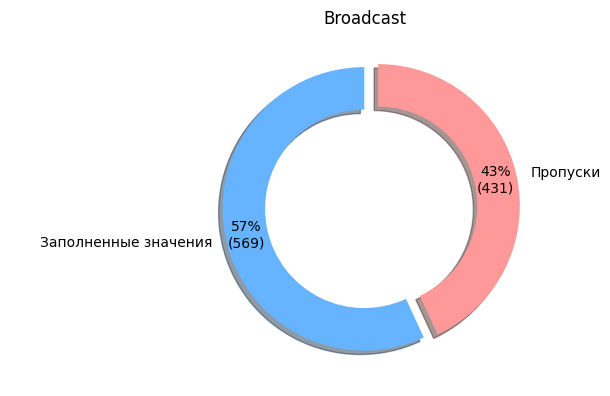

In [35]:
plot_donut_chart(data, 'Broadcast')

In [36]:
df = data.copy()
df['Missing_Broadcast'] = data['Broadcast'].isna()

df_agg = df.groupby(by='Type').agg({'Missing_Broadcast': 'sum'}).reset_index()

In [37]:
df_agg

,Type,Missing_Broadcast
0,Movie,235
1,ONA,53
2,OVA,84
3,Special,37
4,TV,0
5,TV Special,22


In [38]:
df_agg['Missing_Broadcast'].sum()

431

Видно, что все пропущенные значения это значения относящиеся к не телевизионному формату. Т.е это на самом деле не пропуски.

In [39]:
data['Broadcast'].fillna('No Broadcast', inplace=True)

In [40]:
data['Broadcast'].unique()[:5]

array(['Fridays at 23:00 (JST)', 'Sundays at 17:00 (JST)',
       'Wednesdays at 02:05 (JST)', 'Wednesdays at 18:00 (JST)',
       'Mondays at 00:10 (JST)'], dtype=object)

Выведем значения, которые не соответствуют шаблону

In [41]:
mask = ~data['Broadcast'].str.match('[MTWSF][a-z]+days at \d{2}:\d{2} \(JST\)').fillna(True)
data['Broadcast'][mask].unique()

array(['No Broadcast', 'Unknown', 'Not scheduled once per week',
       'Wednesdays at Unknown', 'Saturdays at Unknown',
       'Sundays at Unknown'], dtype=object)

In [42]:
mask = ~data['Broadcast'].isin(['Unknown', 'Not scheduled once per week', 'No Broadcast'])

In [43]:
def get_day_time(s):
    '''Функция выделяет день и время трансляции'''
    regex_day = r'[MTWSF][a-z]+day'
    regex_time = r'\d{2}:\d{2}'
    
    match = re.match(regex_day, s)
    day, time = None, None
    if match is not None:
        day = match.group()    
    match = re.search(regex_time, s)
    if match is not None:
        time = match.group()
    
    return day, time
    

In [44]:
data.loc[mask, ['Broadcast day', 'Broadcast time']] = data[mask]['Broadcast'].apply(get_day_time).to_list()

In [45]:
mask = (data['Broadcast'] == 'No Broadcast')
data.loc[mask, ['Broadcast day', 'Broadcast time']] = 'No Broadcast'
mask = (data['Broadcast'] == 'Not scheduled once per week')
data.loc[mask, ['Broadcast day', 'Broadcast time']] = 'Not scheduled once per week'

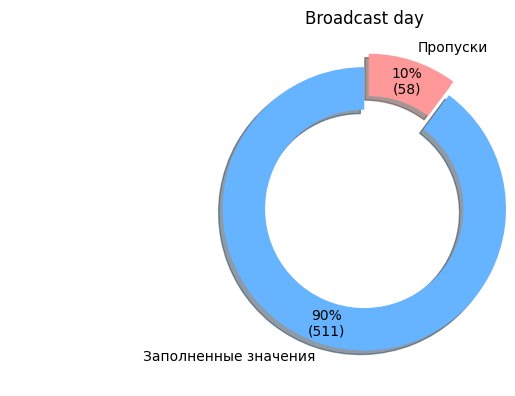

In [46]:
plot_donut_chart(data[data['Type'] == 'TV'], 'Broadcast day')

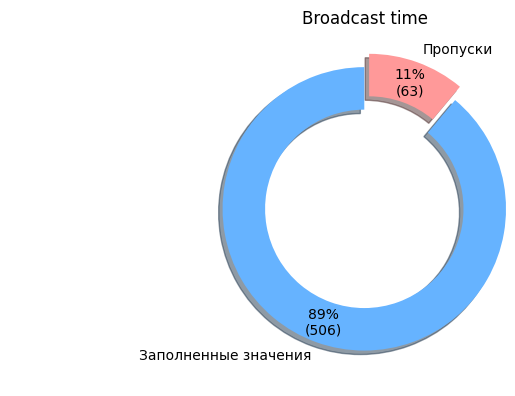

In [47]:
plot_donut_chart(data[data['Type'] == 'TV'], 'Broadcast time')

In [48]:
data['Broadcast day'] = pd.Categorical(data['Broadcast day'])
data['Broadcast time'] = pd.Categorical(data['Broadcast time'])
data.drop('Broadcast', axis=1, inplace=True)

##### Колонка Producers

In [49]:
data['Producers'].str.split(', ').explode().value_counts().head(10)

Aniplex                         166
Dentsu                          120
None found                      111
Shueisha                        111
add some                        111
Movic                           109
Kodansha                         92
Mainichi Broadcasting System     89
TV Tokyo                         85
Kadokawa                         69
Name: Producers, dtype: int64

In [50]:
data.loc[data['Producers'] == 'None found, add some', 'Producers'] = None

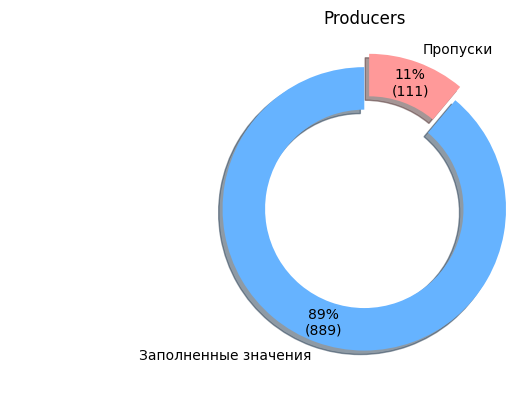

In [51]:
plot_donut_chart(data, 'Producers')

In [52]:
data['Producers'] = data['Producers'].astype('string')

##### Колонка Licensors

In [53]:
data['Licensors'].head(10)

0              None found, add some
1    Funimation, Aniplex of America
2                        Funimation
3           Funimation, Crunchyroll
4                        Funimation
5                       Eleven Arts
6                         VIZ Media
7              None found, add some
8                         VIZ Media
9                  Sentai Filmworks
Name: Licensors, dtype: object

In [54]:
data.loc[data['Licensors'] == 'None found, add some', 'Licensors'] = None

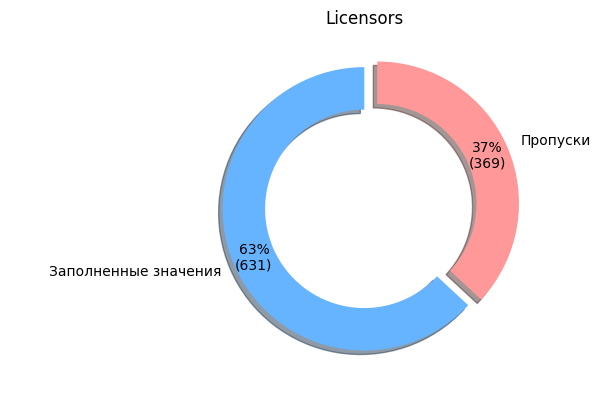

In [55]:
plot_donut_chart(data, 'Licensors')

In [56]:
mask = (~data['Licensors'].isna())
data.loc[mask, 'Licensors'] = data[mask]['Licensors'].str.split(', ').apply(lambda x: ', '.join(sorted(x)))

In [57]:
data['Licensors'] = data['Licensors'].astype('string')

##### Колонка Studios

In [58]:
mask = data['Studios'] == 'None found, add some'
data[mask]

,Score,Popularity,Rank,Members,Description,English,Type,Episodes,Status,Producers,...,Genres,Demographic,Duration,Rating,Aired start,Aired end,Premiere Season,Premiere Year,Broadcast day,Broadcast time
669,7.97,11638,670,1,Animated short film about the backstory of the...,Genshin Impact: The Song Burning in the Embers,ONA,1,Finished Airing,miHoYoAnime,...,"ActionAction, DramaDrama, FantasyFantasy",NaN,7 min.,PG-13 - Teens 13 or older,2024-04-17,2024-04-17,Spring,2024,No Broadcast,No Broadcast
757,7.92,7671,758,6,"Marisa, an ordinary magician, suspects a youka...",Touhou Fantasy Kaleidoscope: The Memories of P...,OVA,18,Finished Airing,<NA>,...,NaN,NaN,16 min. per ep.,PG-13 - Teens 13 or older,2011-08-12,2023-05-07,Summer,2011,No Broadcast,No Broadcast
947,7.82,3942,948,32,A stop-motion anime that will bundle with the ...,Haikyuu!!,OVA,10,Finished Airing,Shueisha,...,NaN,ShounenShounen,2 min. per ep.,PG-13 - Teens 13 or older,2020-03-04,NaT,Winter,2020,No Broadcast,No Broadcast


In [59]:
data.loc[mask, 'Studios'] = ['miHoYoAnime', 'Studio Massket', 'Production I.G']

In [60]:
data['Studios'] = data['Studios'].str.split(', ').apply(lambda x: ', '.join(sorted(x)))

In [61]:
data['Studios'] = data['Studios'].astype('string')

##### Колонка Source

In [62]:
data['Source'].value_counts()

Manga           547
Original        160
Light novel     110
Novel            63
Web manga        32
Visual novel     24
4-koma manga     20
Web novel        14
Game             14
Other             6
Mixed media       6
Book              1
Unknown           1
Music             1
Picture book      1
Name: Source, dtype: int64

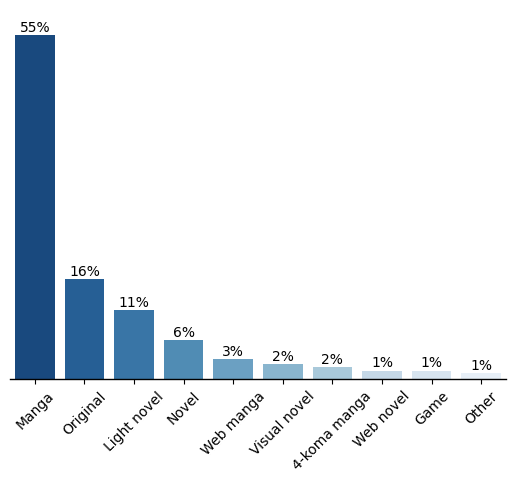

In [63]:
plot_bar(data['Source'])

In [64]:
manga_categories = ['Manga', 'Web manga', '4-koma manga', 'Picture book']
novel_categories = ['Light novel', 'Novel', 'Web novel', 'Visual novel']
other_categories = ['Game', 'Music', 'Mixed media', 'Book', 'Other']


data['Source'] = data['Source'].replace(manga_categories, 'Manga')
data['Source'] = data['Source'].replace(novel_categories, 'Novel')
data['Source'] = data['Source'].replace(other_categories, 'Other')

In [65]:
mask = (data['Source'] == 'Unknown')
data[mask]

,Score,Popularity,Rank,Members,Description,English,Type,Episodes,Status,Producers,...,Genres,Demographic,Duration,Rating,Aired start,Aired end,Premiere Season,Premiere Year,Broadcast day,Broadcast time
345,8.22,5293,346,15,"Jealous of Suneo's new robot toy, Nobita asks ...",Doraemon: Nobita and the Steel Troops - The Ne...,Movie,1,Finished Airing,"TV Asahi, Asatsu DK",...,"AdventureAdventure, ComedyComedy, FantasyFantasy",NaN,1 hr. 48 min.,PG - Children,2011-03-05,2011-03-05,Winter,2011,No Broadcast,No Broadcast


In [66]:
data.loc[mask, 'Source'] = 'Manga'

In [67]:
data['Source'] = pd.Categorical(data['Source'])

##### Колонка Genres 

In [68]:
data['Genres']

0         AdventureAdventure, DramaDrama, FantasyFantasy
1      ActionAction, AdventureAdventure, DramaDrama, ...
2             DramaDrama, Sci-FiSci-Fi, SuspenseSuspense
3               ActionAction, ComedyComedy, Sci-FiSci-Fi
4             ActionAction, DramaDrama, SuspenseSuspense
                             ...                        
995           ActionAction, RomanceRomance, Sci-FiSci-Fi
996     ActionAction, AdventureAdventure, FantasyFantasy
997     AdventureAdventure, ComedyComedy, MysteryMystery
998     AdventureAdventure, ComedyComedy, MysteryMystery
999                                                  NaN
Name: Genres, Length: 1000, dtype: object

In [69]:
mask = ~data['Genres'].isna()

data.loc[mask, 'Genres'] = data.loc[mask, 'Genres'].str.split(', ').apply(
    lambda genres: ', '.join([genre[:len(genre) // 2] for genre in genres])
)
data['Genres'].head(5)

0            Adventure, Drama, Fantasy
1    Action, Adventure, Drama, Fantasy
2              Drama, Sci-Fi, Suspense
3               Action, Comedy, Sci-Fi
4              Action, Drama, Suspense
Name: Genres, dtype: object

Заполним пропуски:

In [70]:
for _ in range(2):
    mask = data['Genres'].isna()
    data.loc[mask, 'Genres'] = pd.Series(
        [anime_details.get_anime_genres(name) for name in tqdm(data.loc[mask, 'English'], desc='Getting genres')]
    ).values

Getting genres:   0%|          | 0/229 [00:00<?, ?it/s]

Getting genres:   0%|          | 0/16 [00:00<?, ?it/s]

In [71]:
mask = data['Genres'].isna()
data[mask]

,Score,Popularity,Rank,Members,Description,English,Type,Episodes,Status,Producers,...,Genres,Demographic,Duration,Rating,Aired start,Aired end,Premiere Season,Premiere Year,Broadcast day,Broadcast time
249,8.32,3433,250,42,With university entrance exams and graduation ...,Sasaki and Miyano: Graduation,Movie,1,Finished Airing,"Frontier Works, Movic, Nippon Columbia, U-NEXT...",...,None,NaN,51 min.,PG-13 - Teens 13 or older,2023-02-17,2023-02-17,Winter,2023,No Broadcast,No Broadcast
344,8.22,1230,345,194,Yoshikazu Miyano's troubles first start one ho...,Sasaki and Miyano,TV,12,Finished Airing,"Frontier Works, Movic, Nippon Columbia, Sound ...",...,None,NaN,23 min. per ep.,PG-13 - Teens 13 or older,2022-01-10,2022-03-28,Winter,2022,Monday,00:30
417,8.17,457,418,490,The number of terrorist acts in Japan has neve...,Lycoris Recoil,TV,13,Finished Airing,"Aniplex, BS11, ABC Animation",...,None,NaN,24 min. per ep.,PG-13 - Teens 13 or older,2022-07-02,2022-09-24,Summer,2022,Saturday,23:30
469,8.12,2964,470,55,"Four young women—an artist who quit drawing, a...",Jellyfish Can't Swim in the Night,TV,12,Currently Airing,"Movic, KlockWorx, Asmik Ace, Tohokushinsha Fil...",...,None,NaN,23 min. per ep.,PG-13 - Teens 13 or older,2024-04-07,2024-09-10,Spring,2024,Sunday,01:00
670,7.97,2303,671,84,In his exhibition performance for the Grand Pr...,Yuri!!! On ICE: Yuri Plisetsky GPF in Barcelon...,Special,1,Finished Airing,Avex Pictures,...,None,NaN,2 min.,PG-13 - Teens 13 or older,2017-05-26,2017-05-26,Spring,2017,No Broadcast,No Broadcast
781,7.90,4687,782,21,An OVA of SKET Dance bundled with the 29th vol...,SKET Dance: Imouto no Nayami ni Nayamu Ani ni ...,OVA,1,Finished Airing,Shueisha,...,None,ShounenShounen,27 min.,PG-13 - Teens 13 or older,2013-02-04,2013-02-04,Winter,2013,No Broadcast,No Broadcast
988,7.81,2741,989,63,Yori Asanagi is a mature girl in many ways but...,Whisper Me a Love Song,TV,12,Currently Airing,"TV Asahi, NBCUniversal Entertainment Japan, Yo...",...,None,NaN,23 min. per ep.,PG-13 - Teens 13 or older,2024-04-14,2024-09-10,Spring,2024,Sunday,01:30


In [72]:
mask = data['Genres'].isna()
data[mask]['English']

249                        Sasaki and Miyano: Graduation
344                                    Sasaki and Miyano
417                                       Lycoris Recoil
469                    Jellyfish Can't Swim in the Night
670    Yuri!!! On ICE: Yuri Plisetsky GPF in Barcelon...
781    SKET Dance: Imouto no Nayami ni Nayamu Ani ni ...
988                               Whisper Me a Love Song
Name: English, dtype: string

Заполним оставшиеся пропуски вручную

In [73]:
mask = data['Genres'].isna()

data.loc[mask, 'Genres'] = pd.Series([
    'Boys Love',
    'Boys Love',
    'Action',
    'Music, Showbiz, Slice of Life',
    'Award Winning, Sports',
    'Comedy',
    'Girls Love'    
]).values

In [74]:
data['Genres'] = data['Genres'].str.split(', ').apply(lambda x: ', '.join(sorted(x)))

In [75]:
data['Genres'] = data['Genres'].astype('string')

##### Колонка Demographic

In [76]:
data['Demographic'].unique()

array(['ShounenShounen', nan, 'SeinenSeinen', 'ShoujoShoujo',
       'JoseiJosei', 'KidsKids'], dtype=object)

In [77]:
mask = ~data['Demographic'].isna()
data.loc[mask, 'Demographic'] = data.loc[mask, 'Demographic'].apply(lambda x: x[0:len(x)//2])

In [78]:
data['Demographic'] = data['Demographic'].astype('category')

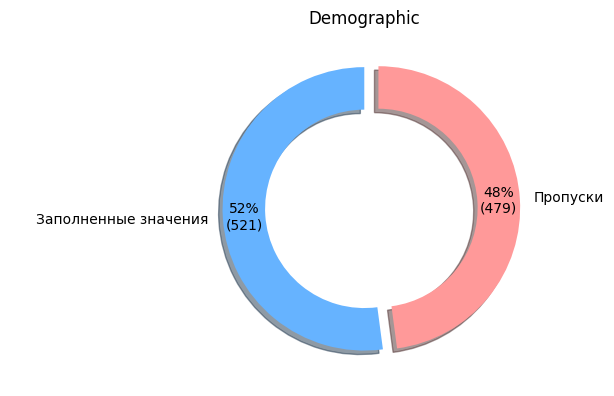

In [79]:
plot_donut_chart(data, 'Demographic')

##### Колонка Duration

In [80]:
data['Duration'].unique()[:20]

array(['24 min. per ep.', '23 min. per ep.', '1 hr. 44 min.',
       '26 min. per ep.', '2 hr. 10 min.', '22 min. per ep.',
       '25 min. per ep.', '1 hr. 50 min.', '1 hr. 12 min. per ep.',
       '2 hr. 20 min.', '1 hr. 46 min.', '2 hr. 4 min.', '1 hr. 36 min.',
       '1 hr. 23 min.', '24 min.', '29 min. per ep.', '30 min. per ep.',
       '2 hr. 2 min.', '1 hr. 59 min.', '2 hr. 13 min.'], dtype=object)

In [81]:
def to_minutes(duration):
    
    regex = r'(\d+)\s*(hr|min)\.?'
    time = 0
    
    for t in re.findall(regex, duration):
        if t[1] == 'min':
            time += int(t[0])
        else:
            time += int(t[0]) * 60
    return time

In [82]:
data['Duration minutes'] = data['Duration'].apply(to_minutes)
data.drop('Duration', axis=1, inplace=True)

##### Колонка Raiting

In [83]:
data['Rating'].unique()

array(['PG-13 - Teens 13 or older', 'R - 17+ (violence & profanity)',
       'R+ - Mild Nudity', 'PG - Children', 'G - All Ages'], dtype=object)

In [84]:
data['Rating'] = pd.Categorical(data['Rating'])

## Итоговый датасет

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Score             1000 non-null   float64       
 1   Popularity        1000 non-null   int64         
 2   Rank              1000 non-null   category      
 3   Members           1000 non-null   int64         
 4   Description       1000 non-null   string        
 5   English           1000 non-null   string        
 6   Type              1000 non-null   category      
 7   Episodes          1000 non-null   int64         
 8   Status            1000 non-null   category      
 9   Producers         889 non-null    string        
 10  Licensors         631 non-null    string        
 11  Studios           1000 non-null   string        
 12  Source            1000 non-null   category      
 13  Genres            1000 non-null   string        
 14  Demographic       521 non

In [86]:
data = data[[
    'English',
    'Description',
    'Type',
    'Episodes',
    'Status',
    'Aired start',
    'Aired end',
    'Premiere Season',
    'Premiere Year',
    'Broadcast day',
    'Broadcast time',
    'Producers',
    'Licensors',
    'Studios',
    'Source',
    'Genres',
    'Demographic',
    'Duration minutes',
    'Rating',
    'Score',
    'Popularity',
    'Rank',
    'Members'
]]

In [87]:
data.head(5)

,English,Description,Type,Episodes,Status,Aired start,Aired end,Premiere Season,Premiere Year,Broadcast day,...,Studios,Source,Genres,Demographic,Duration minutes,Rating,Score,Popularity,Rank,Members
0,Frieren: Beyond Journey's End,During their decade-long quest to defeat the D...,TV,28,Finished Airing,2023-09-29,2024-03-22,Fall,2023,Friday,...,Madhouse,Manga,"Adventure, Drama, Fantasy",Shounen,24,PG-13 - Teens 13 or older,9.38,284,1,710
1,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64,Finished Airing,2009-04-05,2010-07-04,Spring,2009,Sunday,...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Shounen,24,R - 17+ (violence & profanity),9.09,3,2,3
2,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,TV,24,Finished Airing,2011-04-06,2011-09-14,Spring,2011,Wednesday,...,White Fox,Novel,"Drama, Sci-Fi, Suspense",NaN,24,PG-13 - Teens 13 or older,9.07,13,3,2
3,Gintama Season 4,"Gintoki, Shinpachi, and Kagura return as the f...",TV,51,Finished Airing,2015-04-08,2016-03-30,Spring,2015,Wednesday,...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Shounen,24,PG-13 - Teens 13 or older,9.06,342,4,630
4,Attack on Titan Season 3 Part 2,Seeking to restore humanity's diminishing hope...,TV,10,Finished Airing,2019-04-29,2019-07-01,Spring,2019,Monday,...,Wit Studio,Manga,"Action, Drama, Suspense",Shounen,23,R - 17+ (violence & profanity),9.05,21,5,2


In [88]:
# Сохраняем итоговый датасет
data.to_csv('../data/processed/Top_Anime_data_clean.csv', index=False)